# K- Means Clustering

In [1]:
# importing all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# checking the head of data frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# checking the datatypes of data 
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [5]:
#Checking the missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
# checking the no of unique species
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
#Description of the Dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis

### lets check the correlation of the given features of data

In [11]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


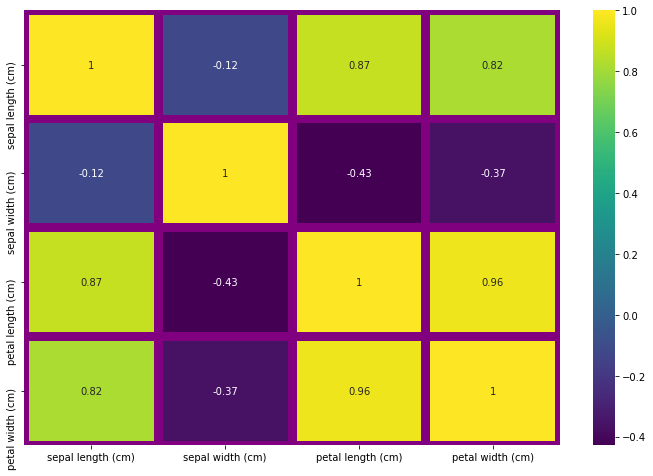

In [12]:
#Checking correlation between columns visually
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',lw=8,linecolor='purple')

### we can see that correlation between maximum features come out to be high

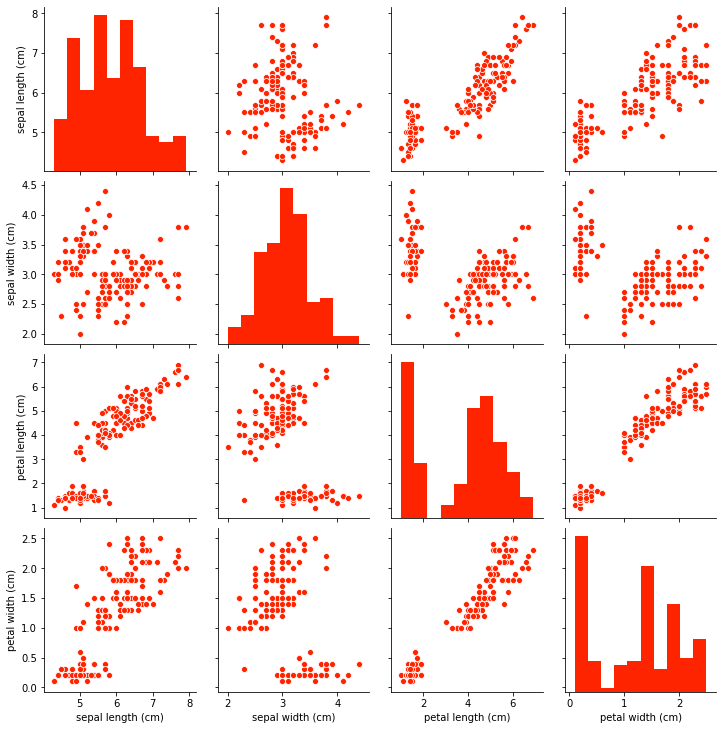

In [27]:
sns.set_palette('autumn')
sns.pairplot(df)

## From the pair plot above, we can only be confirmed about the linear relationship between the Petal_length and the Petal_width. Otherwise all the relations are not yet confirmed.

In [14]:
#checking shape of iris
df.shape

(150, 4)

# Finding the number of clusters using K-Means
# Elbow Method-

Text(0.5, 1.0, 'Elbow Method Visualisation')

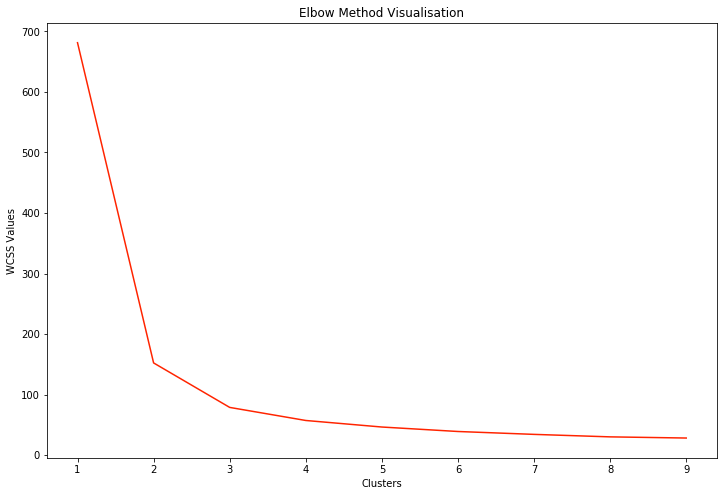

In [15]:
from sklearn.cluster import KMeans
wcss=[]
K_rng=10

for i in range(1,K_rng):
    K=KMeans(i)
    K.fit(df)
    w=K.inertia_
    wcss.append(w)
    
Clusters=range(1,K_rng)
plt.figure(figsize=(12,8))
plt.plot(Clusters,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS Values') #Within Cluster Sum of Squares
plt.title('Elbow Method Visualisation')

# 'ELBOW' is around 2 or 3 clusters. Hence will consider K=2 and K=3

.

.

### for k=2

In [16]:

#Fitting the model
K2= KMeans(2)
K2.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
#Prediction using the model
iris_pred=df.copy()
iris_pred['Predicted']=K2.fit_predict(df)

In [18]:
iris_pred

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [19]:
iris_pred['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

Text(0.5, 1.0, 'Sepal_length vs Sepal_width(K=2)')

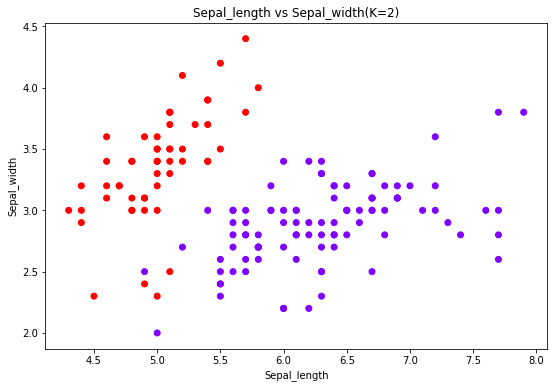

In [20]:
#Visualise the clusters (Sepal features) after prediction
plt.figure(figsize=(9,6))
plt.scatter(iris_pred['sepal length (cm)'], iris_pred['sepal width (cm)'], c=iris_pred['Predicted'], cmap = 'rainbow')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_length vs Sepal_width(K=2)')

Text(0.5, 1.0, 'Petal_length vs Petal_width(K=2)')

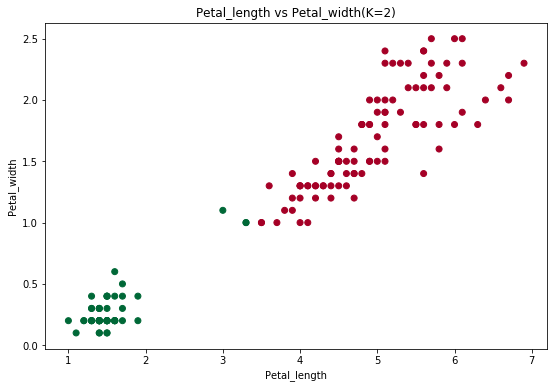

In [21]:

#Visualise the clusters (Petal features) after prediction
plt.figure(figsize=(9,6))
plt.scatter(iris_pred['petal length (cm)'], iris_pred['petal width (cm)'], c=iris_pred['Predicted'], cmap = 'RdYlGn')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.title('Petal_length vs Petal_width(K=2)')

# For K=3

In [22]:

#Fitting the model
K3= KMeans(3)
K3.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
#Prediction using the model
iris_pred=df.copy()
iris_pred['Predicted']=K3.fit_predict(df)

Text(0.5, 1.0, 'Sepal_length vs Sepal_width(K=3)')

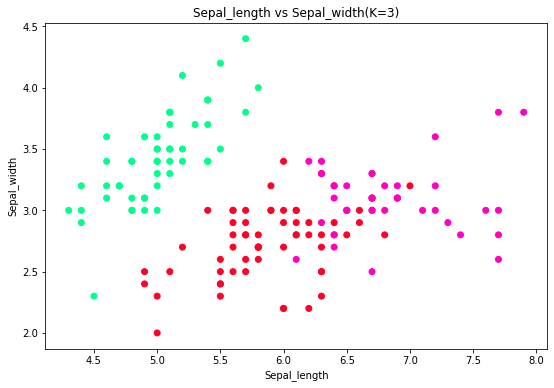

In [24]:
#Visualise the clusters (Sepal features) after prediction
plt.figure(figsize=(9,6))
plt.scatter(iris_pred['sepal length (cm)'], iris_pred['sepal width (cm)'], c=iris_pred['Predicted'], cmap = 'gist_rainbow')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_length vs Sepal_width(K=3)')

Text(0.5, 1.0, 'Petal_length vs Petal_width(K=3)')

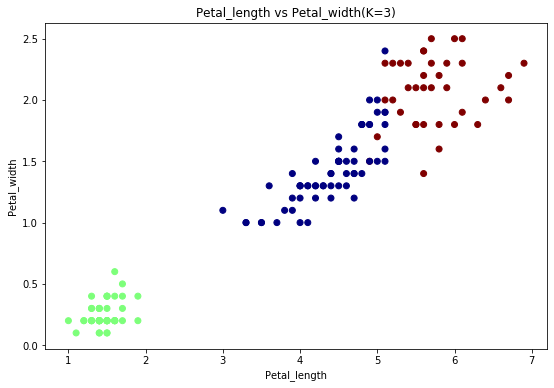

In [28]:
#Visualise the clusters (Petal features) after prediction
plt.figure(figsize=(9,6))
plt.scatter(iris_pred['petal length (cm)'], iris_pred['petal width (cm)'], c=iris_pred['Predicted'], cmap = 'jet')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.title('Petal_length vs Petal_width(K=3)')

# now ploting and fitting sepal length ,	sepal width ,	petal length and petal width  together

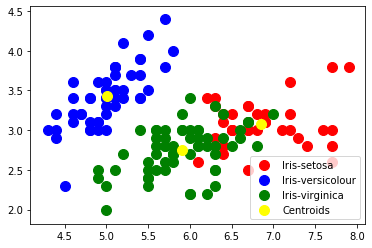

In [26]:
# Applying kmeans to the dataset / Creating the kmeans classifier
x = df.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

.

# After considering the values of K=2 or 3; we can conclude from above visualisations that 3 is the optimum value of K in this Iris dataset. It can also be said that Petal features are better to recognise the clusters than the Sepal features.

# END
